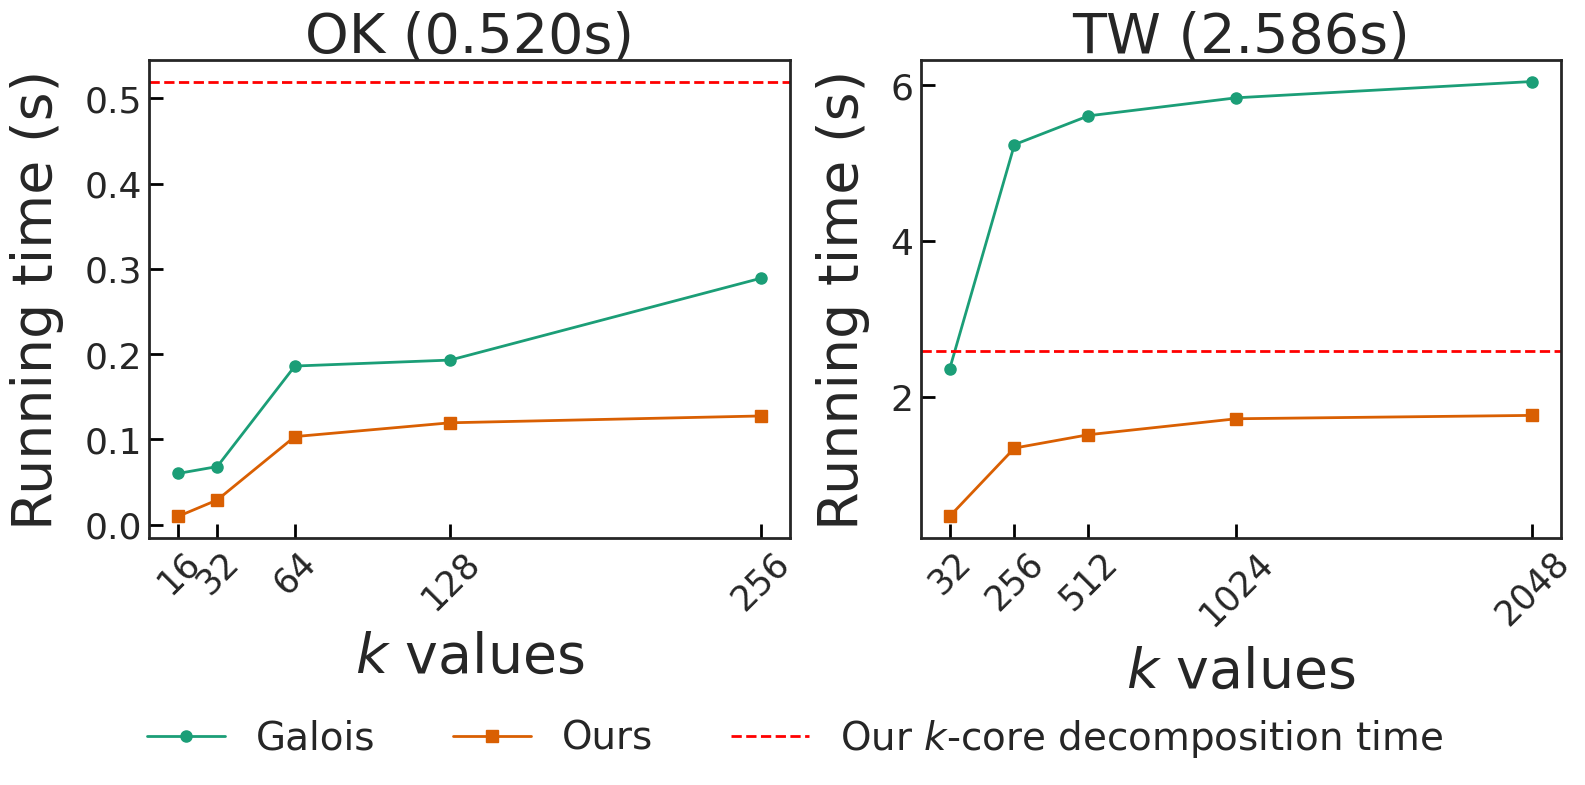

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Load data from the CSV file
data = pd.read_csv('./../data/subk.csv')

orkut_data = data[data['dataset'] == 'orkut']
twitter_data = data[data['dataset'] == 'twitter']

orkut_k_values = orkut_data['k_values']
galois_orkut = orkut_data['galois_time']
ours_orkut = orkut_data['ours_time']
orkut_std = orkut_data['std_time'].iloc[0]

twitter_k_values = twitter_data['k_values']
galois_twitter = twitter_data['galois_time']
ours_twitter = twitter_data['ours_time']
twitter_std = twitter_data['std_time'].iloc[0]

plt.style.use('default')  # Reset to default style
sns.set_style("white")  # Use white style without grids
colors = sns.color_palette("Dark2", 2)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.3)

def setup_axis(ax, x_values, y1_values, y2_values, std_value, title, color1, color2):
    ax.plot(x_values, y1_values, marker='o', linestyle='-', color=color1,
            label='Galois', linewidth=2, markersize=8)
    ax.plot(x_values, y2_values, marker='s', linestyle='-', color=color2,
            label='Ours', linewidth=2, markersize=8)
    ax.set_xlabel('$k$ values', fontsize=40, labelpad=10)
    ax.set_ylabel('Running time (s)', fontsize=40, labelpad=15)
    ax.set_title(f'{title} ({std_value:.3f}s)', fontsize=40)
    ax.axhline(y=std_value, color='red', linestyle='--', linewidth=2)

    # larger font size
    ax.set_xticks(x_values, minor=False)

#     ax.xaxis.set_minor_locator(AutoMinorLocator(0))  # Disables minor ticks on x-axis

    ax.tick_params(axis='x', which='major', bottom=True, top=False, direction='in',
                   length=10, width=2, color='black', pad=5, labelsize=26)
    ax.tick_params(axis='y', which='major', left=True, right=False, direction='in',
                   length=10, width=2, color='black', pad=5, labelsize=26)

    ax.tick_params(axis='y', which='minor', left=False, right=False, labelsize=27)

    ax.tick_params(axis='x', rotation=45, labelsize=25)

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2)

setup_axis(axes[0], orkut_k_values, galois_orkut, ours_orkut,
           orkut_std, 'OK', colors[0], colors[1])

setup_axis(axes[1], twitter_k_values, galois_twitter, ours_twitter,
           twitter_std, 'TW', colors[0], colors[1])


std_line = Line2D([0], [0], color='red', linestyle='--', linewidth=2,
                  label='Our $k$-core decomposition time')
fig.legend(handles=[axes[0].lines[0], axes[0].lines[1], std_line],
           loc='lower center', fontsize=28, ncol=3, bbox_to_anchor=(0.5, -0.05),
           frameon=True, edgecolor='none', fancybox=False, shadow=False)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('subk.pdf', bbox_inches='tight', dpi=300)
plt.show()
